<a href="https://colab.research.google.com/github/martinsphl/postgraduate_puc-rio_sprint_1/blob/main/phlm_mvp_sprint_1_puc_rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Sprint 1: Análise de Dados e Boas Práticas

> ## Desenvolvido por Paulo Henrique Leal Martins



Deste ponto inicia uma jornada de preparação de dados para alimentar algoritmos supervisionados de classificação, utilizando conhecimentos adquiridos na *Sprint* 1 da Pós-graduação de *Data Science* & *Analytics* pela PUC-Rio (2023). O código deste trabalho está disponíveis em repositório público no github, [clique aqui para conferir](https://github.com/martinsphl/postgraduate_puc-rio_sprint_2/tree/main).

Vamos começar adicionando as princia

In [52]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
import joblib # To save and load trained models
import requests # To get trained models by url

# To prepare the train and test subsets and reduce overfitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

# Metrics of evaluation
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Preprocess data: standardization and normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [53]:
# Avoiding warning messages
import warnings
warnings.filterwarnings('ignore')

# Setting a global seed
np.random.seed(7)

## 1.Definição do Problema

O mercado de criptomoedas é um sistema complexo, extremamente volátil e de alto risco. Os preços das criptomoedas podem sofrer grandes variações em curtos períodos de tempo, resultando em oportunidades de lucro significativas, como também em perdas consideráveis.

Por acreditar que o ganho é diretamente proporcional ao risco, investidores têm aumentado o volume de operações de compra e venda ao longo da última década, fenômeno que sugere que o mercado é promissor. Para maximizar o lucro dos investidores, o objetivo deste trabalho é criar uma solução com *machine learning* para auxiliar na tomada de decisão quanto ao preço futuro do bitcoin nos próximos 28 dias.

**1.1. Descrição do problema**

Por se tratar de um sistema complexo, podemos afirmar que são vários fatores que contribuem para a volatilidade do mercado, tais como: oferta e demanda, eventos macroeconômicos, notícias regulatórias, avanços tecnológicos, confiança dos investidores, etc.

Na atualidade existem mais de 10 mil ativos digitais, dos quais aproximadamente 3% desses apresentam volume considerável de transações. Haja visto a quantidade de variáveis que impactam no preço de uma criptomoeda, este trabalho se restringe a investigar os indicadores diários do Bitcoin entre 29/04/2013 e 06/07/2021.

Em vista disso, vamos utilizar dados históricos de preço de abertura e fechamento de mercado, menor e maior preço do dia e capitalização de mercado (Market Cap) disponibilizados pela plataforma Kaggle. Para além disso, enriquecemos os dados com a cotação das moedas Dólar e Euro, como indicadores econômicos globais.


**1.2. Hipóteses sobre o problema**

A partir da experiência tácita como investidor em criptomoedas, este trabalho vem validar as seguintes hipóteses:

1. Obter uma classificação de oportunidade baseada na variação futura do preço do Bitcoin para 7 dias, utilizando apenas dados históricos, é uma abordagem aceitável (acurácia do modelo superior a 70%);
2. Obter uma classificação de oportunidade baseada na variação futura do preço do Bitcoin para 28 dias, utilizando apenas dados históricos, é uma abordagem aceitável (acurácia do modelo superior a 70%).

**1.3. Critérios de qualidade para selecionar os dados**

Os dados selecionados atenderam os seguintes critérios de aceitação:


1.   Estimada reputação do repositório pela comunidade
2.   Prova social de utilização do *dataset* na casa de milhares
3.   *Datasets* com pelos menos 7 anos de registros diários
4.   Ausência de ruídos quanto ao domínio das variáveis
5.   Indicador Kaggle de Usabilidade do *Datasets* superior a 90%

**1.4. Descrição dos dados**

As séries temporais analisadas advêm de 3 distintos *datasets*, a saber:

*   [*Bitcoin Historical Price*](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_BinanceCoin.csv)

   * SNo: Número da observação (variável discreta e de valor único, tal como uma chave primária)
   * Name: Nome da criptomoeda (variável nominal de conteúdo igual a 'Bitcoin')
   * Symbol: Símbolo da criptomoeda (variável nominal de conteúdo igual a 'BTC')
   * Date: Data da observação (variável temporal no formato YYYY-MM-DD HH:MM:SS)
   * High: Maior preço observado no dia (em dólar, variável contínua e positiva)  
   * Low: Menor preço observado no dia (em dólar, variável contínua e positiva)
   * Open: Primeiro preço observado no dia (em dólar, variável contínua e positiva)
   * Close: Último preço observado no dia (em dólar, variável contínua e positiva)
   * Volume: Total negociado no dia (em dólar, variável contínua e positiva)
   * Marketcap: Valor de mercado do Bitcoin no dia (em dólar, variável contínua e positiva)


*   [*Daily Exchange Rates per Euro*](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020)

   * Period\Unit: Data da observação (variável temporal no formato YYYY-MM-DD)
   * US Dollar: Valor de um Euro em dólar (variável contínua e positiva)
   * Outras colunas: Valor de um Euro em outras moedas (variável contínua e positiva). Outras moedas estão fora do escopo desta análise e serão deletadas do arquivo .csv.


*   [*US Dollar Index data*](https://www.kaggle.com/datasets/balabaskar/us-dollar-index-data)

   * Date: Data da observação (variável temporal no formato Mês DD, YYYY)
   * Price: Índice do dólar no fechamento de mercado (variável contínua e positiva)
   * Open: Índice do dólar na abertura de mercado (variável contínua e positiva)
   * High: Maior valor de índice observado no dia (variável contínua e positiva)
   * Low: Menor valor de índice observado no dia (variável contínua e positiva)
   * Change %: Variação do índice do dólar em relação ao dia anterior (variável contínua em porcentagem)

## 2. Coleta e Análise de Dados

Nesta etapa vamos obter os dados necessários para verificar as hipóteses listadas anteriormete. Devido os dados virem de diferentes origens, atividades de Extração, Transformação e Carga (ETL) podem ser necessárias para prepará-los para os algoritmos de *machine learning*

### 2.1. Carga dos Dados

A partir da url de cada *dataset*, que está hospedado no github, vamos transformar os dados de formato .csv para *dataframe*. Portanto, utilizaremos o pacote Pandas desde a obtenção dos dados até a manipulação deles.

In [54]:
# Defining the url of each dataset
bitcoin_url = 'https://raw.githubusercontent.com/martinsphl/postgraduate_puc-rio_sprint_2/main/dataset/coin_bitcoin.csv'
euro_url = 'https://raw.githubusercontent.com/martinsphl/postgraduate_puc-rio_sprint_2/main/dataset/euro-daily-hist_1999_2022.csv'
dollar_url = 'https://raw.githubusercontent.com/martinsphl/postgraduate_puc-rio_sprint_2/main/dataset/us_dollar_index_historical_data.csv'

# Creating pandas dataframe from each dataset
df_bitcoin_price = pd.read_csv(bitcoin_url, names=['pk', 'name', 'symbol', 'date', 'biggest_price', 'lowest_price', 'first_price', 'last_price', 'volume', 'marketcap'], skiprows=1, delimiter=',')
df_euro_factor = pd.read_csv(euro_url, names=['date', 'dollar_factor'], skiprows=1, delimiter=',')
df_dollar_index = pd.read_csv(dollar_url, names=['date', 'last_price', 'first_price', 'biggest_price', 'lowest_price', 'perc_variation'], skiprows=1, delimiter=',')

A seguir vamos exibir as 3 primeiras linhas de cada *dataframe*

In [55]:
print('Bitcoin Price Dataframe\n')
print (df_bitcoin_price.head(3).to_markdown())
print('\n\nEuro Factor Dataframe\n')
print(df_euro_factor.head(3).to_markdown())
print('\n\nIndex Dollar Dataframe\n')
print (df_dollar_index.head(3).to_markdown())

Bitcoin Price Dataframe

|    |   pk | name    | symbol   | date                |   biggest_price |   lowest_price |   first_price |   last_price |   volume |   marketcap |
|---:|-----:|:--------|:---------|:--------------------|----------------:|---------------:|--------------:|-------------:|---------:|------------:|
|  0 |    1 | Bitcoin | BTC      | 2013-04-29 23:59:59 |         147.488 |         134    |       134.444 |       144.54 |        0 | 1.60377e+09 |
|  1 |    2 | Bitcoin | BTC      | 2013-04-30 23:59:59 |         146.93  |         134.05 |       144     |       139    |        0 | 1.54281e+09 |
|  2 |    3 | Bitcoin | BTC      | 2013-05-01 23:59:59 |         139.89  |         107.72 |       139     |       116.99 |        0 | 1.29895e+09 |


Euro Factor Dataframe

|    | date       |   dollar_factor |
|---:|:-----------|----------------:|
|  0 | 2023-05-26 |          1.0751 |
|  1 | 2023-05-25 |          1.0735 |
|  2 | 2023-05-24 |          1.0785 |


Index Dollar Dataf

Por fim, vamos verificar a dimensionalidade dos *dataframes*:

In [56]:
# Showing the number of rows and columns of each dataframe
print('Bitcoin Price Dataframe: ' + str(df_bitcoin_price.shape))
print('Euro Factor Dataframe: ' + str(df_euro_factor.shape))
print('Index Dollar Dataframe: ' + str(df_dollar_index.shape))

Bitcoin Price Dataframe: (2991, 10)
Euro Factor Dataframe: (6311, 2)
Index Dollar Dataframe: (5623, 6)


### 2.2. Análise de Dados

Nesta fase vamos verificar individualmente as variáveis de cada *dataframe*, realizando análises sobre presença de valor null, transformações de dados, estatística descritiva, tipo de distribuição, presença de outliers e correlação entre variáveis.

**2.2.1 Presença de Valor Null e Tipo de Dado**

Um dos critérios de aceitação para a escolha do *dataset* foi ausência de dados faltantes. Nesse sentido, vamos realizar um dupla verificação para constatar ausência de valor null para todas as variáveis de cada um dos dataframes. Para isso, vamos utilizar o método info disponível para dataframes do tipo Pandas.

* *Bitcoin Price Dataframe*

In [57]:
print(df_bitcoin_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pk             2991 non-null   int64  
 1   name           2991 non-null   object 
 2   symbol         2991 non-null   object 
 3   date           2991 non-null   object 
 4   biggest_price  2991 non-null   float64
 5   lowest_price   2991 non-null   float64
 6   first_price    2991 non-null   float64
 7   last_price     2991 non-null   float64
 8   volume         2991 non-null   float64
 9   marketcap      2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB
None


* *Euro Factor Dataframe*

In [58]:
print(df_euro_factor.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           6311 non-null   object
 1   dollar_factor  6311 non-null   object
dtypes: object(2)
memory usage: 98.7+ KB
None


* *Index Dollar Dataframe*

In [59]:
print(df_dollar_index.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5623 entries, 0 to 5622
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            5623 non-null   object 
 1   last_price      5623 non-null   float64
 2   first_price     5623 non-null   float64
 3   biggest_price   5623 non-null   float64
 4   lowest_price    5623 non-null   float64
 5   perc_variation  5623 non-null   object 
dtypes: float64(4), object(2)
memory usage: 263.7+ KB
None


Conforme observado acima, há variáveis que foram automaticamente classificadas para o tipo *object*. Algumas delas serão desprezadas na etapa de pré-processamento dos dados por terem um único valor possível. Outras, no entanto, serão tratadas e transformadas para outro tipo de dado, a saber: *dollar_factor* e *perc_variation*.

**2.2.2. Transformações de Dados**

Esta análise conta com um *dataframe* principal e outros dois auxiliares, que serão utilizados para enrequimento dos dados. O que eles têm em comum é a coluna date. Em vista disso, vamos iniciar as transformações por essa variável.

Como demonstrado anteriormente na etapa de Carga de Dados, cada *dataframe* tem um formato distinto de data, o que impossibilita a execução imediata de um *merge*. Portanto, vamos realizar transformações para que todos eles tenham o mesmo padrão (yyyy-mm-dd).

In [60]:
# Transforming the column content to string type and then taking the first 10 characters
df_bitcoin_price['date'] = df_bitcoin_price['date'].astype('str').str[:10]

# Using to_datetime pandas method to change date format to year-month-day
df_bitcoin_price['date'] = pd.to_datetime(df_bitcoin_price['date']).dt.strftime('%Y-%m-%d')
df_euro_factor['date'] = pd.to_datetime(df_euro_factor['date']).dt.strftime('%Y-%m-%d')
df_dollar_index['date'] = pd.to_datetime(df_dollar_index['date']).dt.strftime('%Y-%m-%d')

# Showing the new output pattern of date column
print('Bitcoin Price Dataframe: ')
print(df_bitcoin_price['date'].head(3))
print('\n')

print('Euro Factor Dataframe: ')
print(df_euro_factor['date'].head(3))
print('\n')

print('Index Dollar Dataframe: ')
print(df_dollar_index['date'].head(3))

Bitcoin Price Dataframe: 
0    2013-04-29
1    2013-04-30
2    2013-05-01
Name: date, dtype: object


Euro Factor Dataframe: 
0    2023-05-26
1    2023-05-25
2    2023-05-24
Name: date, dtype: object


Index Dollar Dataframe: 
0    2001-01-02
1    2001-01-03
2    2001-01-04
Name: date, dtype: object


A partir de agora os 3 *dataframes* estão habilitados para se tornarem um só, através da operação *merge*. Essa operação, no entanto, será realizada na fase de Pré-processamento de Dados, pois tem a tarefa de seleção de características como pré-requisito.

Finalmente vamos tratar as variáveis *dollar_factor* e *perc_variation*, transformando-as do tipo *object* para *float64*. O principal benefício dessa ação é habilitar ambas as variáveis para as 4 seguintes análises (estatística descritiva, tipo de destribuição, presença de *outliers* e correlação entre as variáveis).

In [61]:
# Removing the percentage symbol from perc_variation column and then converting the column Dtype from object to float64
df_dollar_index['perc_variation'] = df_dollar_index['perc_variation'].astype('str').str[0:-1]
df_dollar_index['perc_variation'] = df_dollar_index['perc_variation'].astype('float')
print('Index Dollar Dataframe, perc_variation column: \n')
print(df_dollar_index['perc_variation'].head(3))

Index Dollar Dataframe, perc_variation column: 

0   -0.72
1    1.29
2   -1.23
Name: perc_variation, dtype: float64


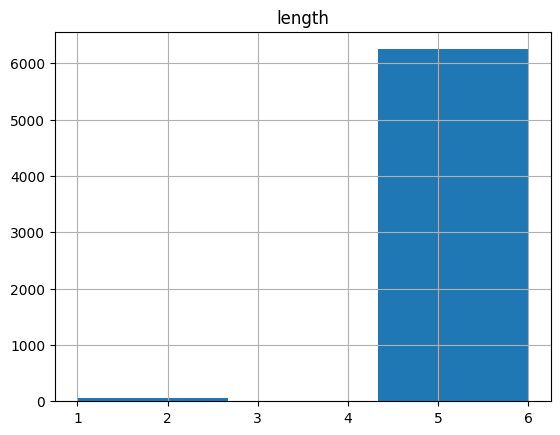

In [62]:
# Checking the length of dollar_factor column and viewing it
df_euro_factor['length'] = df_euro_factor['dollar_factor'].apply(lambda x: len(x))
df_euro_factor.hist(bins=3)
plt.show()


O gráfico sugere que há alguma(s) *flag(s)* indicando ausência de dado para alguns dias. A seguir vamos verificar quantos dias se tratam e quantas *flags* existem:

In [63]:
# Showing the percentage of flagged days
flagged_days = len(df_euro_factor[df_euro_factor.length == 1])
perc_flagged_days = round(100 * flagged_days / len(df_euro_factor),2)
print('Total of flagged days: ' + str(flagged_days) + ' (' + str(perc_flagged_days) + '%)')

# Show all possible flag values
all_possible_flags = df_euro_factor[df_euro_factor.length == 1].dollar_factor.unique()
print('All possible flags: ' + str(all_possible_flags))
df_euro_factor = df_euro_factor.drop('length', axis=1)

# Replace char flag value by zero (numeric flag) and then changing the Dtype of column
df_euro_factor.loc[df_euro_factor.dollar_factor == '-', 'dollar_factor'] = 0
df_euro_factor['dollar_factor'] = df_euro_factor['dollar_factor'].astype('float')

print('\nEuro Factor Dataframe, dollar_factor column: \n')
print(df_euro_factor['dollar_factor'].head(3))



Total of flagged days: 62 (0.98%)
All possible flags: ['-']

Euro Factor Dataframe, dollar_factor column: 

0    1.0751
1    1.0735
2    1.0785
Name: dollar_factor, dtype: float64


Gostaríamos de salientar que esse poucos valores indicados com 0, eles serão tratados na fase de Pré-processamento de Dados, especificamente na tarefa de complementar dados faltantes. Por fim, destacamos que a transformação realizada na variável *dollar_factor* foi um *enabler* para as análises seguintes.

**2.2.3. Estatística Descritiva**

Como *input* para a fase de pré-processamento dos dados, realizamos um resumo da Estatística Descritiva de cada variável com o objetivo de obter *insights* para a etapa posterior. Para isso, utilizamos o método describe disponível para *dataframe* pandas.



* *Bitcoin Price Dataframe*



In [64]:
print(df_bitcoin_price.describe())

                pk  biggest_price   lowest_price   first_price     last_price  \
count  2991.000000    2991.000000    2991.000000  2.991000e+03    2991.000000   
mean   1496.000000    7470.147503    7207.036369  1.096287e+04    7223.273768   
std     863.571653   19418.918471   23569.540721  1.939628e+05   19667.118698   
min       1.000000      74.561096      65.526001  6.850500e+01      68.431000   
25%     748.500000     439.325500     422.928986  4.307185e+02     430.569489   
50%    1496.000000    2425.219971    2269.889893  2.323080e+03    2320.419922   
75%    2243.500000    8750.648546    8320.788866  8.591294e+03    8596.284825   
max    2991.000000  461375.000000  729625.000000  1.052582e+07  602625.000000   

             volume     marketcap  
count  2.991000e+03  2.991000e+03  
mean   4.549152e+11  2.615413e+13  
std    3.561281e+12  6.167511e+13  
min    0.000000e+00  7.997416e+08  
25%    3.036725e+07  6.312252e+09  
50%    9.460360e+08  3.793370e+10  
75%    1.652681e+1

* *Euro Factor Dataframe*

In [65]:
print(df_euro_factor.describe())

       dollar_factor
count    6311.000000
mean        1.179298
std         0.196259
min         0.000000
25%         1.087750
50%         1.182600
75%         1.308500
max         1.599000


* *Index Dollar Dataframe*

In [66]:
print(df_dollar_index.describe())

        last_price  first_price  biggest_price  lowest_price  perc_variation
count  5623.000000  5623.000000    5623.000000   5623.000000     5623.000000
mean     90.503363    90.501930      90.825543     90.184988        0.001279
std      10.689395    10.689031      10.721918     10.658198        0.483794
min      71.330000    71.330000      71.690000     70.700000       -3.020000
25%      81.440000    81.430000      81.720000     81.180000       -0.270000
50%      89.990000    89.990000      90.250000     89.690000        0.000000
75%      96.950000    96.940000      97.250000     96.625000        0.270000
max     120.900000   120.760000     121.020000    119.860000        2.560000


À luz da Estatística Descritiva dos *dataframes*, obtivemos 2 principais *insights*:

*   Normalidade dos Dados: Por definição, uma variável tem distribuição gaussiana se a média, mediana e moda forem iguais. De todas as variáveis analisadas, apenas a *perc_variation*, do *Index Dollar Dataframe*, que se aproxima de uma distribuição normal ideal (média igual a zero). Quanto às outras variáveis, podemos afirmar categoricamente que não seguem à distribuição gaussiana.
*   Presença de *outliers*: Analisando o desvio-padrão das variáveis do *Bitcoin Price Dataframe*, percebemos que o valor do desvio-padrão está acima do valor da média para muita das variáveis, o que nos sugere alta variabilidade e até valores discrepantes.



**2.2.4. Tipo de Distribuição**

A Estatística Descritiva nos ajuda a classificar uma destribuição como igual ou diferente da gaussiana, no entanto uma classificação binária é insuficiente. Distribuições não gaussianas e que se aproximem de uma normal, para alguns casos, podem receber transformações e técnicas estatísticas de distribuição gaussiana. Nesse sentido, a visualização dos dados pelo gráfico de densidade ajuda a identificar esses casos.

Para gerar essa visualização, vamos utilizar o método *plot* do *dataframe* pandas em conjunto com a biblioteca de visualização Matplotlib.

* *Bitcoin Price Dataframe*

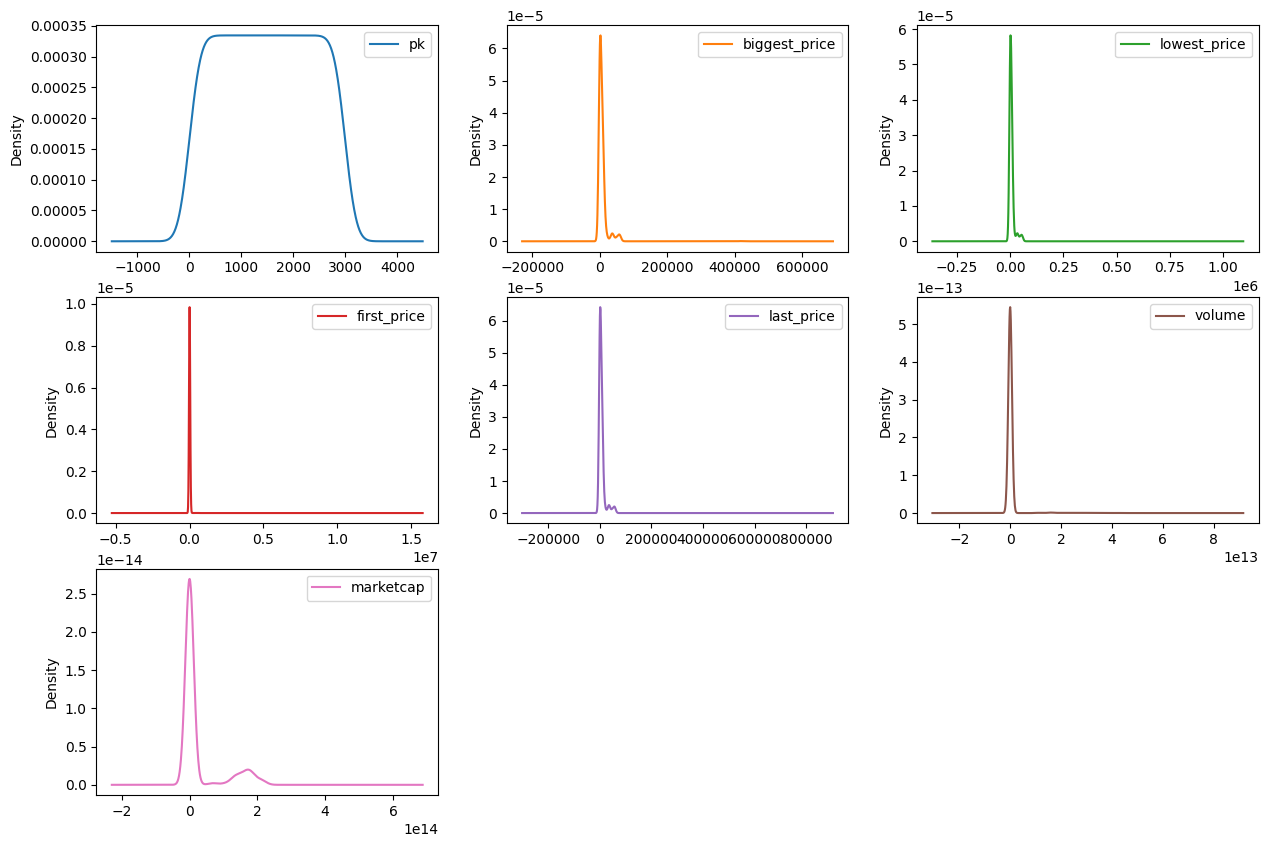

In [67]:
df_bitcoin_price.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

* *Euro Factor Dataframe*

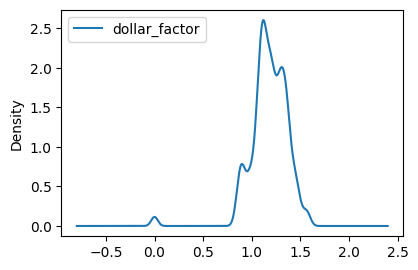

In [68]:
df_euro_factor.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

* *Index Dollar Dataframe*

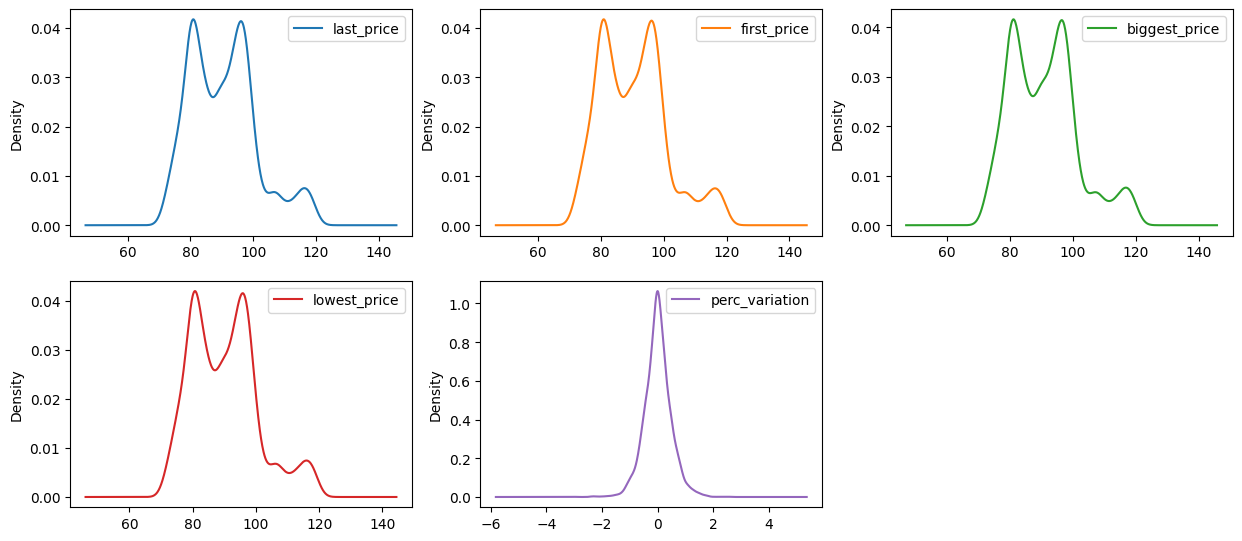

In [69]:
df_dollar_index.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Conforme o esperado para sistemas complexos, há uma imprevisibilidade do preço futuro que é resultado da influência de diversas variáveis, sendo assim a distribuição da série temporal só poderia ser diferente da gaussiana.

**2.2.5. Presença de Outlier**

Alguns dados podem ter sofrido distorção por algum ruído no ato da observação. Nesse sentido, se faz necessário chegar a existência de outliers para na etapa de pré-processamento de dados realizar as devidas correções.

Uma forma para identificar outliers em dados numéricos é calcular a Distância Inter-Quartil (do inglês IQR) e então contar quantos itens estão fora desse intervalo. Outra maneira, esta mais visual e direta ao ponto, é gerar o gráfico *Boxplot* para cada variável numérica e interpretar o seu resultado. Em caso de presença de outlier, aparecerão circulos acima do limite superior ou abaixo do limite inferior do gráfico.

A seguir vamos gerar o *Boxplot* para cada variável numérica dos *dataframes*


* *Bitcoin Price Dataframe*

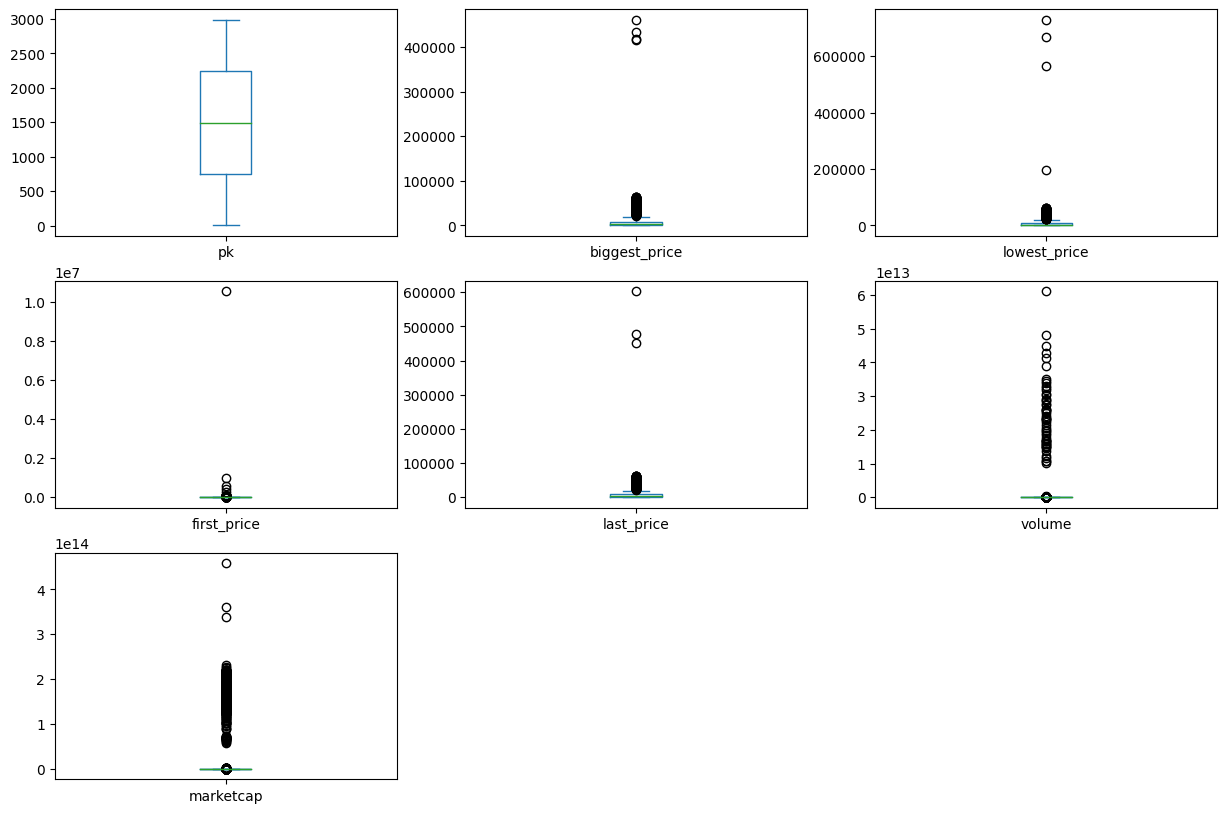

In [70]:
df_bitcoin_price.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

* *Euro Factor Dataframe*

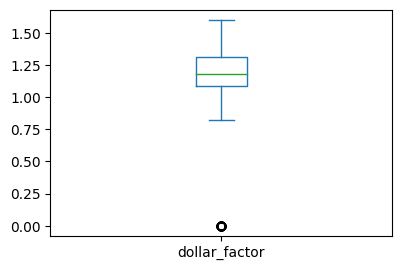

In [71]:
df_euro_factor.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

* *Index Dollar Dataframe*

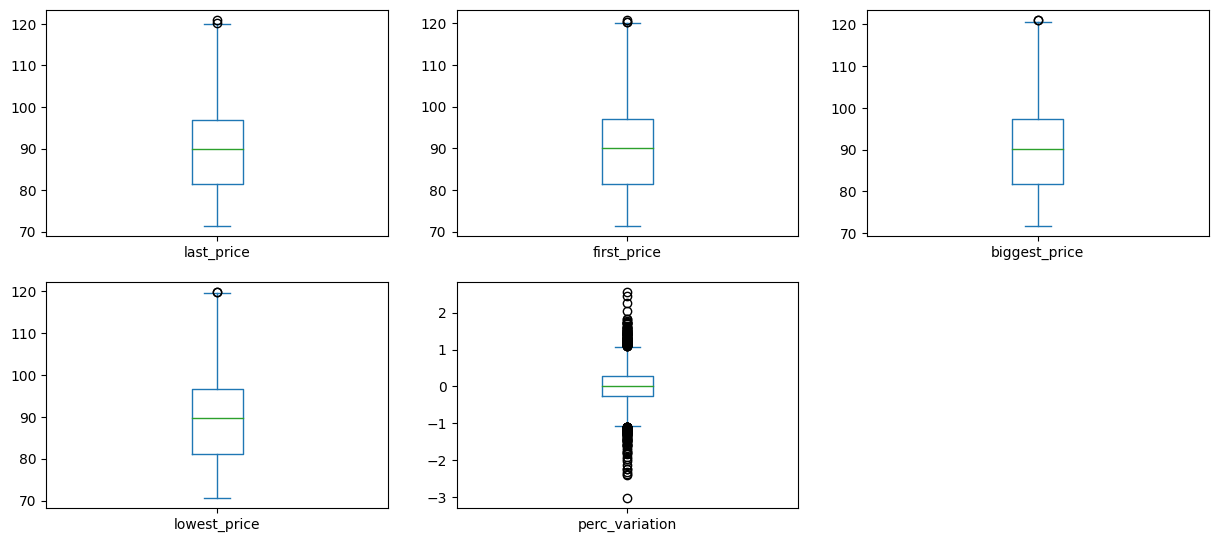

In [72]:
df_dollar_index.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Os gráficos, em sua maioria, indicam presença de outliers, sobretudo aqueles sobre o *Bitcoin Price Dataframe* que se observa maior cardinalidade. Neste ponto cabe reflexão se de fato são ruídos nos dados ou se é mais uma evidência quanto à alta volatilidade do mercado de criptomoeda. Na etapa de pré-processamento de dados teremos a resposta para essa questão.

**2.2.6. Correlação entre Variáveis**

Sabemos que o tempo de processamento dos algoritmos de *machine learning* é diretamente proporcional à quantidade de variáveis disponíveis. Nesse sentido, faz-se necessário identificar o quanto uma variável está diretamente ou inversamente relacionada com outra para auxiliar na seleção das características mais relevantes.

A seguir vamos apresentar um heatmap de cada *dataframe*, onde -1 indica correlação negativa, 0 indica ausência de correção e 1 indica correlação positiva entre as variáveis. Para tanto, utilizaremos a biblioteca Seaborn para essa visualização.

* *Bitcoin Price Dataframe*

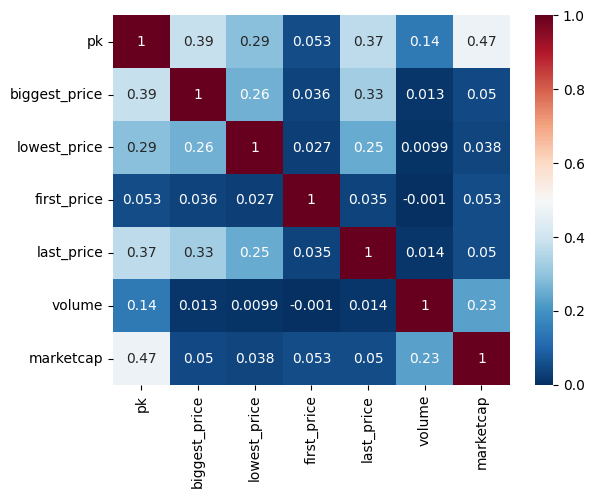

In [73]:
sns.heatmap(df_bitcoin_price.corr(), annot=True, cmap='RdBu_r');

* *Euro Factor Dataframe*

> Como este *dataframe* tem apenas uma coluna numérica de interesse (*dollar_factor*), logo não se aplica calcular a correlação.



* *Index Dollar Dataframe*

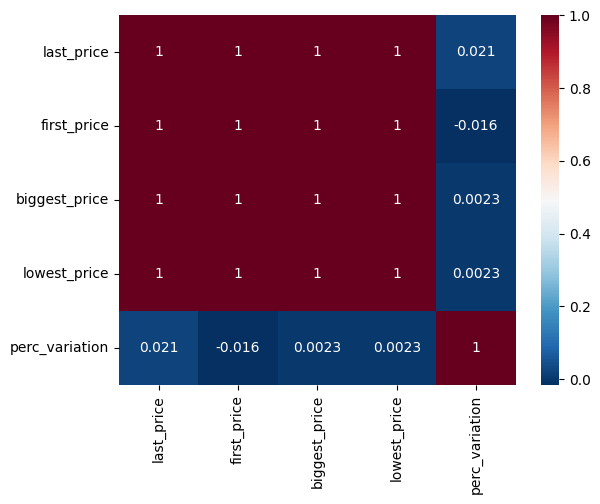

In [74]:
sns.heatmap(df_dollar_index.corr(), annot=True, cmap='RdBu_r');

Quanto ao *dataframe* principal desta análise, *Bitcoin Price Dataframe*, podemos afirmar que as variáveis estão pouco relacionadas entre si, sendo o maior valor observado (0,33) entre as colunas *last_price* e *biggest_price*, o que indica uma fraca correlação. Perceba que a variável pk (chave primária) já está sendo desconsiderada da análise pois em breve será removida na etapa de seleção de características.

Quanto ao *dataframe* para enriquecimento de dados, *Index Dollar Dataframe*, nota-se que quase todas as variáveis estão fortemente correlacionadas entre si, pois seus valores são maiores que 0,999. A única exceção é a variável *perc_variation*, que não é correlacionada com as demais. Tal fenômeno sugere que qualquer uma das outras variáveis é suficiente para enriquecer o *dataframe* principal em conjunto com a *perc_variation*.

## 3. Pré-Processamento de Dados

Na fase anterior, Coleta e Análise de Dados, observamos que existem operações a serem feitas antes de aplicar o *dataframe* aos modelos de *machine learning*. Por isso, nesta etapa vamos concluir a preparação dos dados, realizando tratamento de valores faltantes, limpeza de dados, seleção de características, enriquecimento dos dados e transformação *one-hot-encoding*.

**3.1. Tratamento de Valores Faltantes**

A etapa de 2.2.2, Transformação de Dados, evidenciou que o *Euro Factor Dataframe* apresenta 0.98% de valores faltantes para a variável *dollar_factor*. Para solucionar isso, vamos substituir o valor *flag* (zero) pela média entre duas observações aceitáveis, uma anterior e a outra posterior ao registro faltante.

In [75]:
# First of all, let's create two new columns in the dataframe: previous_dollar_factor and next_dollar_factor
# The code below retrieves the first acceptable value that occurred before and after the current date
df_euro_factor['previous_dollar_factor'] = df_euro_factor['dollar_factor'].where(df_euro_factor['dollar_factor'] > 0).bfill().shift(1)
df_euro_factor['next_dollar_factor'] = df_euro_factor['dollar_factor'].where(df_euro_factor['dollar_factor'] > 0).bfill().shift(-1)

# Now replacing the zero value with the mean value between the previous and next dollar factor and finally deleting those columns
df_euro_factor.loc[df_euro_factor.dollar_factor == 0, 'dollar_factor'] = df_euro_factor.loc[df_euro_factor['dollar_factor'] == 0, ['previous_dollar_factor', 'next_dollar_factor']].mean(axis=1)
df_euro_factor = df_euro_factor.drop(['previous_dollar_factor', 'next_dollar_factor'], axis=1)

# Showing the minimum value of dollar_factor column
print('Current Minimum Value of dollar_factor column: ' + str(df_euro_factor['dollar_factor'].min()))

Current Minimum Value of dollar_factor column: 0.8252


O *Euro Factor Dataframe* teve os seus dados faltantes tratados e agora apresenta o real valor mínimo para a variável dollar_factor (0.8252). Por fim, não foram identificadas outras variáveis com valores faltantes durante à etapa de Coleta e Análise de Dados, logo os 3 *dataframes* estão livres de *missing values* em suas colunas.

**3.2. Limpeza de Dados**

Nesta etapa vamos analizar em maior detalhe os valores *outliers* identificados anteriormente e então decidir o que fazer com eles. Como ações de limpeza de dados, vamos verificar duplicidade de datas, filtrar dados pela intersecção de datas e avaliar *outliers*.

**3.2.1. Verificar Duplicidade de Datas**

Abaixo verificamos se existe alguma diferença na contagem absoluta entre a quantidade de datas e a quantidade de datas únicas. Como se vê abaixo, os *dataframes* estão livres de redundância na coluna data.


In [76]:
# Yes or No Question: The date column contains only deduplicated values?
print('Bitcoin Price Dataframe contains only deduplicated date values : ' + str(len(df_bitcoin_price['date']) == len(df_bitcoin_price['date'].unique())))
print('Euro Factor Dataframe contains only deduplicated date values : ' + str(len(df_euro_factor['date']) == len(df_euro_factor['date'].unique())))
print('Index Dollar Dataframe contains only deduplicated date values : ' + str(len(df_dollar_index['date']) == len(df_dollar_index['date'].unique())))

Bitcoin Price Dataframe contains only deduplicated date values : True
Euro Factor Dataframe contains only deduplicated date values : True
Index Dollar Dataframe contains only deduplicated date values : True


**3.2.2. Filtrar Dados pela Intersecção de Datas**

Dos 3 *dataframes* que estamos utilizando, 2 deles têm finalidade para enrequecimento de dados. Sendo assim, vamos obter uma lista de datas a partir do *Bitcoin Price* para filtrar os outros *dataframe*.

In [77]:
# Getting list of date from main dataframe
lst_available_dates = df_bitcoin_price['date'].unique()

# Filtering Euro Factor and Dollar Index dataframes according the previous list
df_euro_factor = df_euro_factor[df_euro_factor['date'].isin(lst_available_dates)]
df_dollar_index = df_dollar_index[df_dollar_index['date'].isin(lst_available_dates)]

**3.2.3. Avaliar *Outliers***

Esta etapa é a penúltima em que vamos analisar os *dataframes* separadamente. Após ter aplicado o filtro de data, vamos novamente verificar a ocorrência de *outliers* e decidir sobre o que fazer quanto às ocorrências.

Primeiramente vamos criar uma função para exibir o gráfico *boxplot* e calcular os valores notáveis da distribuição de cada variável. Segundo à [documentação do pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html), o cálculo padrão para detecção de *outliers* é 1.5 * IQR (IQR = Q3 - Q1). Logo, vamos utilizar o método *describe* do pandas para obter os valores do primeiro quartil (Q1) e do terceiro (Q3) e então calcular os limites inferior e superior. Por fim, a função calcula a quantidade absoluta e o percentual de dados considerados como *outliers*.

In [78]:
def checking_outlier(df, col):
  # This function is created to give you a boxplot preview and print some notable values ​​from it

  # Showing the Boxplot chart
  df[col].plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
  plt.show()

  # Getting the Q1 and Q3 quartil value
  q1,q3, max, min = df[col].describe().loc[['25%', '75%', 'max', 'min']]
  iqr = q3 - q1

  # Counting how many outliers there are
  limit_inf = q1 - 1.5 * iqr
  limit_sup = q3 + 1.5 * iqr

  # Showing some absolute values of the variable
  total_datapoints = len(df)
  total_outliers = len(df[(df[col] < limit_inf) | (df[col] > limit_sup)])
  print('\nTotal data classified as outlier: ' + str(total_outliers) + ' (' + str(round(100 * total_outliers / total_datapoints,2)) + '%)')
  print('Limit inferior: ' + str(round(limit_inf, 4)) + ', minimum value: ' + str(round(min,4)))
  print('Limit superior: ' + str(round(limit_sup, 4)) + ', maximum value: ' + str(round(max,4)))

* *Euro Factor Dataframe*

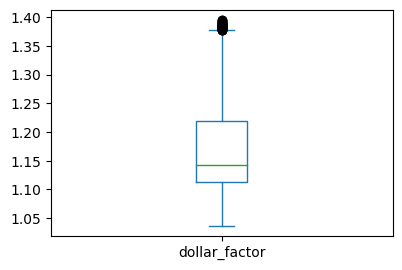


Total data classified as outlier: 41 (1.96%)
Limit inferior: 0.9529, minimum value: 1.0364
Limit superior: 1.378, maximum value: 1.3953


In [79]:
# Call the checking_outlier function
checking_outlier(df_euro_factor, 'dollar_factor')

*   *Index Dollar Dataframe*



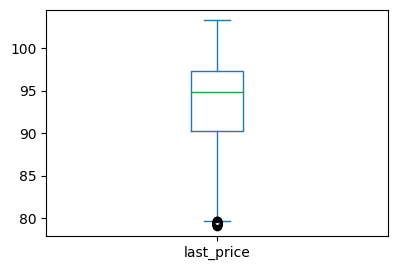


Total data classified as outlier: 20 (0.94%)
Limit inferior: 79.615, minimum value: 79.09
Limit superior: 107.955, maximum value: 103.3




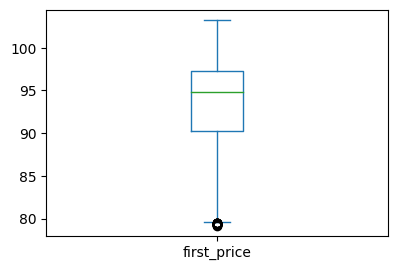


Total data classified as outlier: 17 (0.8%)
Limit inferior: 79.59, minimum value: 79.14
Limit superior: 107.97, maximum value: 103.26




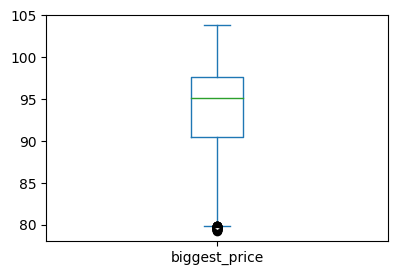


Total data classified as outlier: 22 (1.03%)
Limit inferior: 79.83, minimum value: 79.25
Limit superior: 108.23, maximum value: 103.82




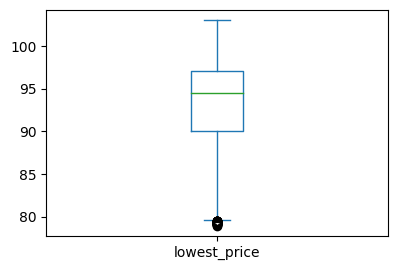


Total data classified as outlier: 25 (1.17%)
Limit inferior: 79.5212, minimum value: 78.91
Limit superior: 107.5513, maximum value: 103.03




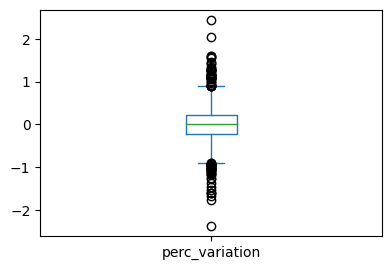


Total data classified as outlier: 85 (3.98%)
Limit inferior: -0.905, minimum value: -2.37
Limit superior: 0.895, maximum value: 2.44




In [80]:
# Call the checking_outlier function for each column of dataframe
for col in df_dollar_index.columns:
  # For only numeric columns
  if df_dollar_index[col].dtype in ['float64','int64']:
    checking_outlier(df_dollar_index, col)
    print('\n')

Como pode ser verificado no item 2.2.5, o atual gráfico *boxplot* de ambos *dataframe* se diferenciam em muito do anterior. Os dados agora classificados como *outliers* foram verificados em outras fontes de dados disponíveis na internet e esses valores fazem sentido para o intervalo analisado (29-04-2013 a 06-07-2021), logo serão mantidos nesta análise.

*   *Bitcoin Price Dataframe*



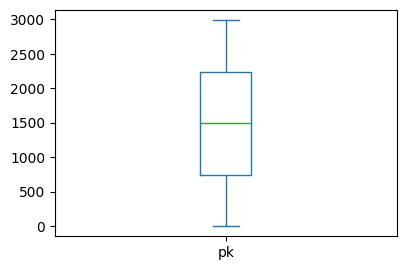


Total data classified as outlier: 0 (0.0%)
Limit inferior: -1494.0, minimum value: 1.0
Limit superior: 4486.0, maximum value: 2991.0




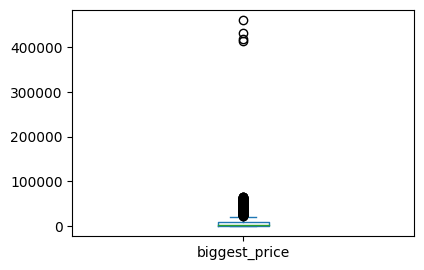


Total data classified as outlier: 207 (6.92%)
Limit inferior: -12027.6591, minimum value: 74.5611
Limit superior: 21217.6331, maximum value: 461375.0




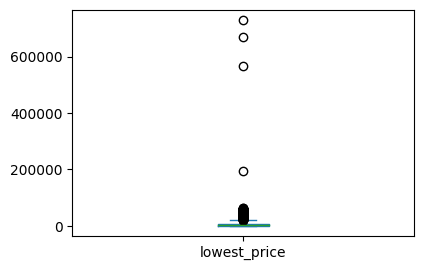


Total data classified as outlier: 206 (6.89%)
Limit inferior: -11423.8608, minimum value: 65.526
Limit superior: 20167.5787, maximum value: 729625.0




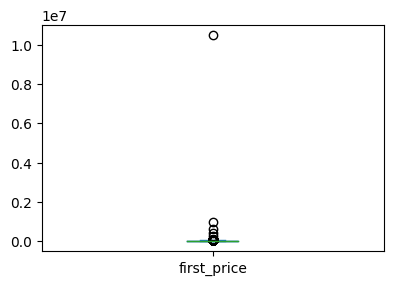


Total data classified as outlier: 207 (6.92%)
Limit inferior: -11810.1452, minimum value: 68.505
Limit superior: 20832.158, maximum value: 10525819.0




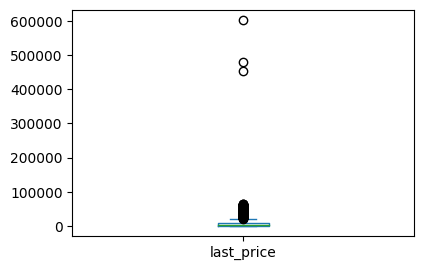


Total data classified as outlier: 206 (6.89%)
Limit inferior: -11818.0035, minimum value: 68.431
Limit superior: 20844.8578, maximum value: 602625.0




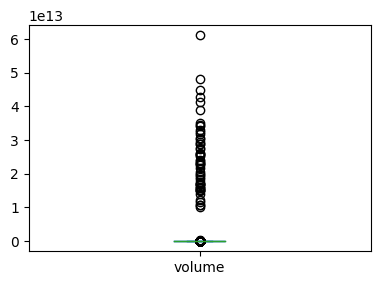


Total data classified as outlier: 296 (9.9%)
Limit inferior: -24714295072.5329, minimum value: 0.0
Limit superior: 41271471120.8881, maximum value: 61112700562079.0




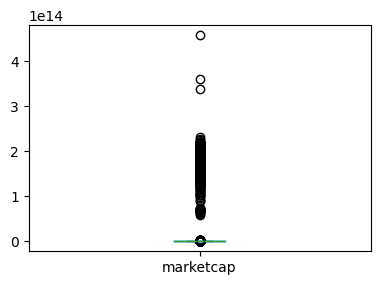


Total data classified as outlier: 650 (21.73%)
Limit inferior: -364418392136.312, minimum value: 799741618.54
Limit superior: 624196660189.72, maximum value: 458297232691903.0




In [81]:
# Call the checking_outlier function for each column of dataframe
for col in df_bitcoin_price.columns:
  # For only numeric columns
  if df_bitcoin_price[col].dtype in ['float64','int64']:
    checking_outlier(df_bitcoin_price, col)
    print('\n')

Das variáveis analisadas acima, duas serão removidas na etapa de seleção de características, a saber:
*   pk: por ser apenas um número único e incremental
*   *marketcap*: por ter tido mais de 20% dos dados consideradas como *outlier*

Quanto às cinco outras variáveis restantes, elas serão divididas em dois grupos:

*   Dados incompletos: no início da série temporal, os valores observados para a variável volume estão ausentes no *dataframe* de origen. Por representar a maior parte dos *outliers* (242 de 296), vamos filtar o *dataframe* a partir da captura desse dado.

In [82]:
# Incomplete Data: Filtered to only data points the volume has captured
df_bitcoin_price = df_bitcoin_price[df_bitcoin_price.volume > 0]

*   Ruído de sinal: haja visto os valores máximos identificados nas colunas *biggest_price, lowest_price, first_price e last_price*, fica claro que houve um ruído na captura do dado, pois o bitcoin nunca chegou nesse patamar em dolar.

Para corrigir os valores discrepantes, criamos uma função que calcula a divisão do preço do dia pelo valor do dia anterior e posterior. Para esse cálculo, assumimos como fator aceitável um crescimento menor do que 2, e identificamos o preço anterior e posterior ao dado discrepante. Finalmente, calculamos a média entre esses dois valores e assumimos o resultado como novo preço do bitcoin do dia.

In [83]:
def removing_noise_bitcoin_price(df, col):
  # Noise in data: For improvavel bitcoin prices, calculate the division between the current price and the previous one and the next one
  # and then replacing the value with the mean value between the previous and next feasible bitcoin price and finally deleting those columns
  df['divided_by_previous_price'] = df[col] / df[col].shift(1)
  df['divided_by_next_price'] = df[col] / df[col].shift(-1)
  df['previous_feasible_price'] = df[col].where(df['divided_by_previous_price'] < 2).bfill().shift(1)
  df['next_feasible_price'] = df[col].where(df['divided_by_next_price'] < 2).bfill().shift(-1)

  # Now replacing the zero value with the mean value between the previous
  df.loc[(df.previous_feasible_price > 2) | (df.next_feasible_price > 2), col] = df.loc[(df.previous_feasible_price > 2) | (df.next_feasible_price > 2), ['previous_feasible_price', 'next_feasible_price']].mean(axis=1)

A partir deste ponto vamos chamar a função *removing_noise_bitcoin_price* para remover os valores discrepantes por ruído e depois chamamos a função *checking_outlier* para verificar se há *outliers* nos novos dados

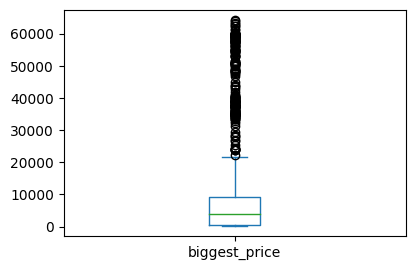


Total data classified as outlier: 202 (7.35%)
Limit inferior: -12469.0018, minimum value: 214.2295
Limit superior: 22137.4031, maximum value: 64228.9099




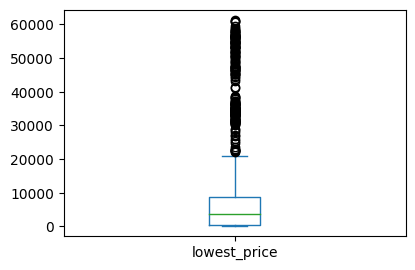


Total data classified as outlier: 201 (7.31%)
Limit inferior: -11913.9904, minimum value: 185.6405
Limit superior: 21141.6666, maximum value: 61285.1583




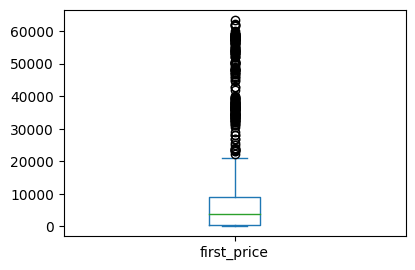


Total data classified as outlier: 201 (7.31%)
Limit inferior: -12168.7423, minimum value: 192.3655
Limit superior: 21596.4064, maximum value: 63391.13




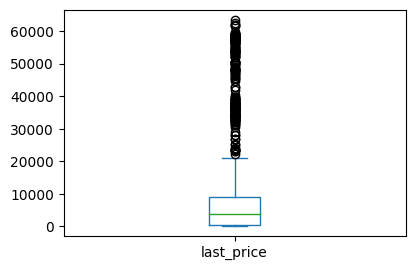


Total data classified as outlier: 202 (7.35%)
Limit inferior: -12170.9879, minimum value: 193.1
Limit superior: 21600.0199, maximum value: 63408.7344




In [84]:
# Call the removing_noise_bitcoin_price and checking_outlier functions for specifics columns
for col in df_bitcoin_price.columns:
  # Just for these 4 columns
  if col in ['biggest_price', 'lowest_price', 'first_price', 'last_price']:
    removing_noise_bitcoin_price(df_bitcoin_price, col)
    checking_outlier(df_bitcoin_price, col)
    print('\n')

df_bitcoin_price = df_bitcoin_price.drop(['previous_feasible_price', 'next_feasible_price', 'divided_by_previous_price', 'divided_by_next_price'], axis=1)

Veja que os novos gráficos são consideravelmente diferentes dos *boxsplot* anteriores, assim como os novos valores máximos de cada variável. Quanto a esses preços agora considerados discrepantes, verificamos em outra fonte de dados na internet e, de fato, houveram momentos em que o preço do bitcoin superou 60 mil dolares. Logo, esses pontos indicados por círculos serão mantidos.

**3.3. Selecionar Variáveis**

Chegou o momento de decidir sobre quais colunas manter e quais remover em cada *dataframe*. Ao longo da fase de Coleta e Análise de Dados, como também durante a fase de pré-processamento, fomos identificando argumentos para reduzir a dimensionalidade dos dados. A seguir vamos indicar os motivos para excluir cada variável.

1.   *Bitcoin Price Dataframe*
  
  > pk: removido por ser apenas um número inteiro único e incremental. Essa variável não apresenta informação relevante para o modelo

  > name: apenas um valor possível nesta coluna (Bitcoin), logo não apresenta informação relevante para o modelo.

  > symbol: apenas um valor possível nesta coluna (BTC), logo não apresenta informação relevante para o modelo.  

  > *marketcap* (valor de mercado): removido por ter mais de 20% dos dados considerado como *outlier*, como também por representar uma relação diretamente proporcional ao valor do bitcoin no momento da obserção.

2.   *Euro Factor Dataframe*

  > Outras moedas que não sejam dólar: Conforme citado no item 1.4, o *dataset* original apresentava o fator de um euro para outras moedas. Todas, exceto dólar, foram removidas por estar fora do escopo da investigação.

3.   *Index Dollar Dataframe*

  > *last_price, biggest_price, lowest_price*: todas essas variáveis estão fortemente correlacionadas com a *first_price* e portanto foram despriorizada neste ponta da análise.

A seguir, fazemos as modificações justificadas acima em cada um dos *dataframes*.







In [85]:
# Deleting some columns and showing the resulting dataframes
df_bitcoin_price = df_bitcoin_price.drop(['pk', 'marketcap', 'name', 'symbol'], axis=1)
df_dollar_index = df_dollar_index.drop(['last_price', 'biggest_price', 'lowest_price'], axis=1)

print('Bitcoin Price Dataframe\n')
print (df_bitcoin_price.head(3).to_markdown())
print('\n\nEuro Factor Dataframe\n')
print(df_euro_factor.head(3).to_markdown())
print('\n\nIndex Dollar Dataframe\n')
print (df_dollar_index.head(3).to_markdown())

Bitcoin Price Dataframe

|     | date       |   biggest_price |   lowest_price |   first_price |   last_price |      volume |
|----:|:-----------|----------------:|---------------:|--------------:|-------------:|------------:|
| 242 | 2013-12-27 |         747.06  |        705.35  |       737.98  |       727.83 | 4.68627e+07 |
| 243 | 2013-12-28 |         747.835 |        709.895 |       733.015 |       736.44 | 3.25058e+07 |
| 244 | 2013-12-29 |         756.83  |        722.795 |       739.665 |       741.98 | 1.90113e+07 |


Euro Factor Dataframe

|     | date       |   dollar_factor |
|----:|:-----------|----------------:|
| 487 | 2021-07-06 |          1.1838 |
| 488 | 2021-07-05 |          1.1866 |
| 489 | 2021-07-02 |          1.1823 |


Index Dollar Dataframe

|      | date       |   first_price |   perc_variation |
|-----:|:-----------|--------------:|-----------------:|
| 3168 | 2013-04-29 |         82.36 |            -0.39 |
| 3169 | 2013-04-30 |         82.15 |            -0.4

**3.4. Enriquecer Dados**

Finalmente vamos reduzir de 3 *dataframes* para um, realizando o *merge* entre eles a partir da coluna *date*. Uma vez feito, por fim, vamos propor novas *features* para treinar o modelo.

**3.4.1. *Merge* dos *Dataframes***

In [86]:
# Merge the 3 dataframes
df_cleaned_enriched_bitcoin_price = pd.merge(df_bitcoin_price, df_euro_factor, on=['date'], how='inner')
df_cleaned_enriched_bitcoin_price = pd.merge(df_cleaned_enriched_bitcoin_price, df_dollar_index, on=['date'], how='inner')

# Just renaming some columns
df_cleaned_enriched_bitcoin_price = df_cleaned_enriched_bitcoin_price.rename(columns={'dollar_factor': 'euro_dollar_factor', 'first_price_y': 'dollar_first_price', 'perc_variation': 'perc_change_dollar', 'first_price_x': 'first_price'})
print(df_cleaned_enriched_bitcoin_price.head(5).to_markdown())

# Freeing memory of the variables below
df_bitcoin_price = None
df_euro_factor = None
df_dollar_index = None

|    | date       |   biggest_price |   lowest_price |   first_price |   last_price |      volume |   euro_dollar_factor |   dollar_first_price |   perc_change_dollar |
|---:|:-----------|----------------:|---------------:|--------------:|-------------:|------------:|---------------------:|---------------------:|---------------------:|
|  0 | 2013-12-27 |         747.06  |        705.35  |       737.98  |      727.83  | 4.68627e+07 |               1.3814 |                80.51 |                -0.11 |
|  1 | 2013-12-30 |         754.595 |        726.305 |       744.185 |      749.53  | 2.07077e+07 |               1.3783 |                80.29 |                -0.49 |
|  2 | 2013-12-31 |         770.975 |        747.605 |       748.16  |      763.765 | 2.08973e+07 |               1.3791 |                80    |                 0.04 |
|  3 | 2014-01-02 |         804.75  |        772.045 |       778.91  |      795.06  | 3.84895e+07 |               1.3658 |                80.12 |          

**3.4.2. Novas *Features***

O objetivo deste trabalho é criar uma solução com *machine learning* para auxiliar na tomada de decisão quanto ao preço futuro do bitcoin nos próximos 28 dias. Durante à utilização do modelo, o usuário informa no dia N os dados de mercado do dia anterior (N-1) para obter a variação futura do preço do bitcoin a, por exemplo, 7 dias à frente (N+7).

Em vista disso, precisamos modificar o *dataframe* para que na data N as colunas tenham informações do dia N-1, a seguir aplicamos a função *shift* em todas as colunas numéricas:

In [87]:
# Ordering the data by date column
df_cleaned_enriched_bitcoin_price = df_cleaned_enriched_bitcoin_price.sort_values(by=['date'], ascending=True)

# Create a column to keep the real price of the day
df_cleaned_enriched_bitcoin_price['price_of_the_day'] = df_cleaned_enriched_bitcoin_price['lowest_price']

# Make sure that on day N the columns have information about the previous day (N-1)
for col in df_cleaned_enriched_bitcoin_price.columns[1:9]:
  df_cleaned_enriched_bitcoin_price[col] = df_cleaned_enriched_bitcoin_price[col].shift(1)

Antes de criar novas variáveis, vamos verificar a correlação entre as variáveis da atual versão do *dataframe*:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1923 entries, 0 to 1922
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1923 non-null   object 
 1   biggest_price       1922 non-null   float64
 2   lowest_price        1922 non-null   float64
 3   first_price         1922 non-null   float64
 4   last_price          1922 non-null   float64
 5   volume              1922 non-null   float64
 6   euro_dollar_factor  1922 non-null   float64
 7   dollar_first_price  1922 non-null   float64
 8   perc_change_dollar  1922 non-null   float64
 9   price_of_the_day    1923 non-null   float64
dtypes: float64(9), object(1)
memory usage: 165.3+ KB
None


<Axes: >

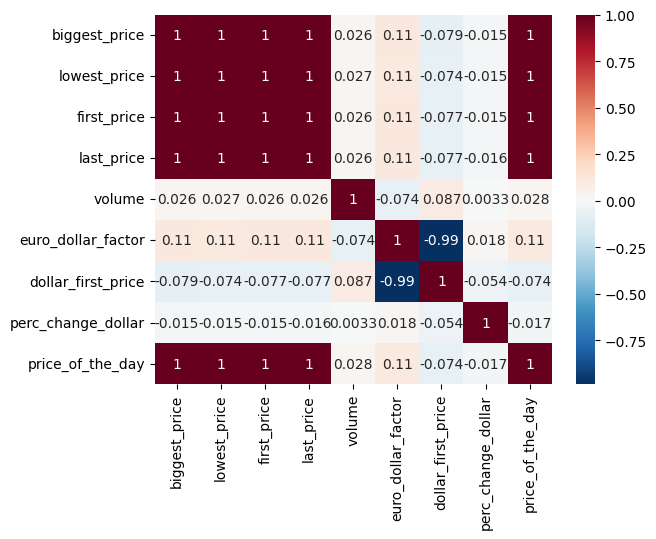

In [88]:
print(df_cleaned_enriched_bitcoin_price.info())
sns.heatmap(df_cleaned_enriched_bitcoin_price.corr(), annot=True, cmap='RdBu_r')

Conforme apresentado anteriormente, temos variáveis com forte correlação positiva e negativa. Quanto à primeira, percebemos que as variáveis *biggest_price, lowest_price, first_price e last_price* podem ser explicadas a partir de uma delas, logo vamos levar apenas uma delas para a fase de modelagem. Vamos assumir uma atitude conservadora quanto à predição do preço do bitcoin, levando para o modelo a variável *lowest_price*.

Sobre a forte correlação negativa entre as variáveis *euro_dollar_factor* e *dollar_first_price*, vamos escolher apenas uma delas para levar à modelagem. Sendo assim, decidimos por remover a coluna *dollar_first_price* porquê temos a variável *perc_change_dollar* de mesma origem e que está não correlacionada com a *euro_dollar_factor*.

Em seguida vamos criar variáveis que registrem a média móvel dos últimos 28, 21, 14, 7, 1 dia(s) das colunas *lowest_price, euro_dollar_factor e perc_change_dollar* e então verificar a correlação das novas variáveis.

<Axes: >

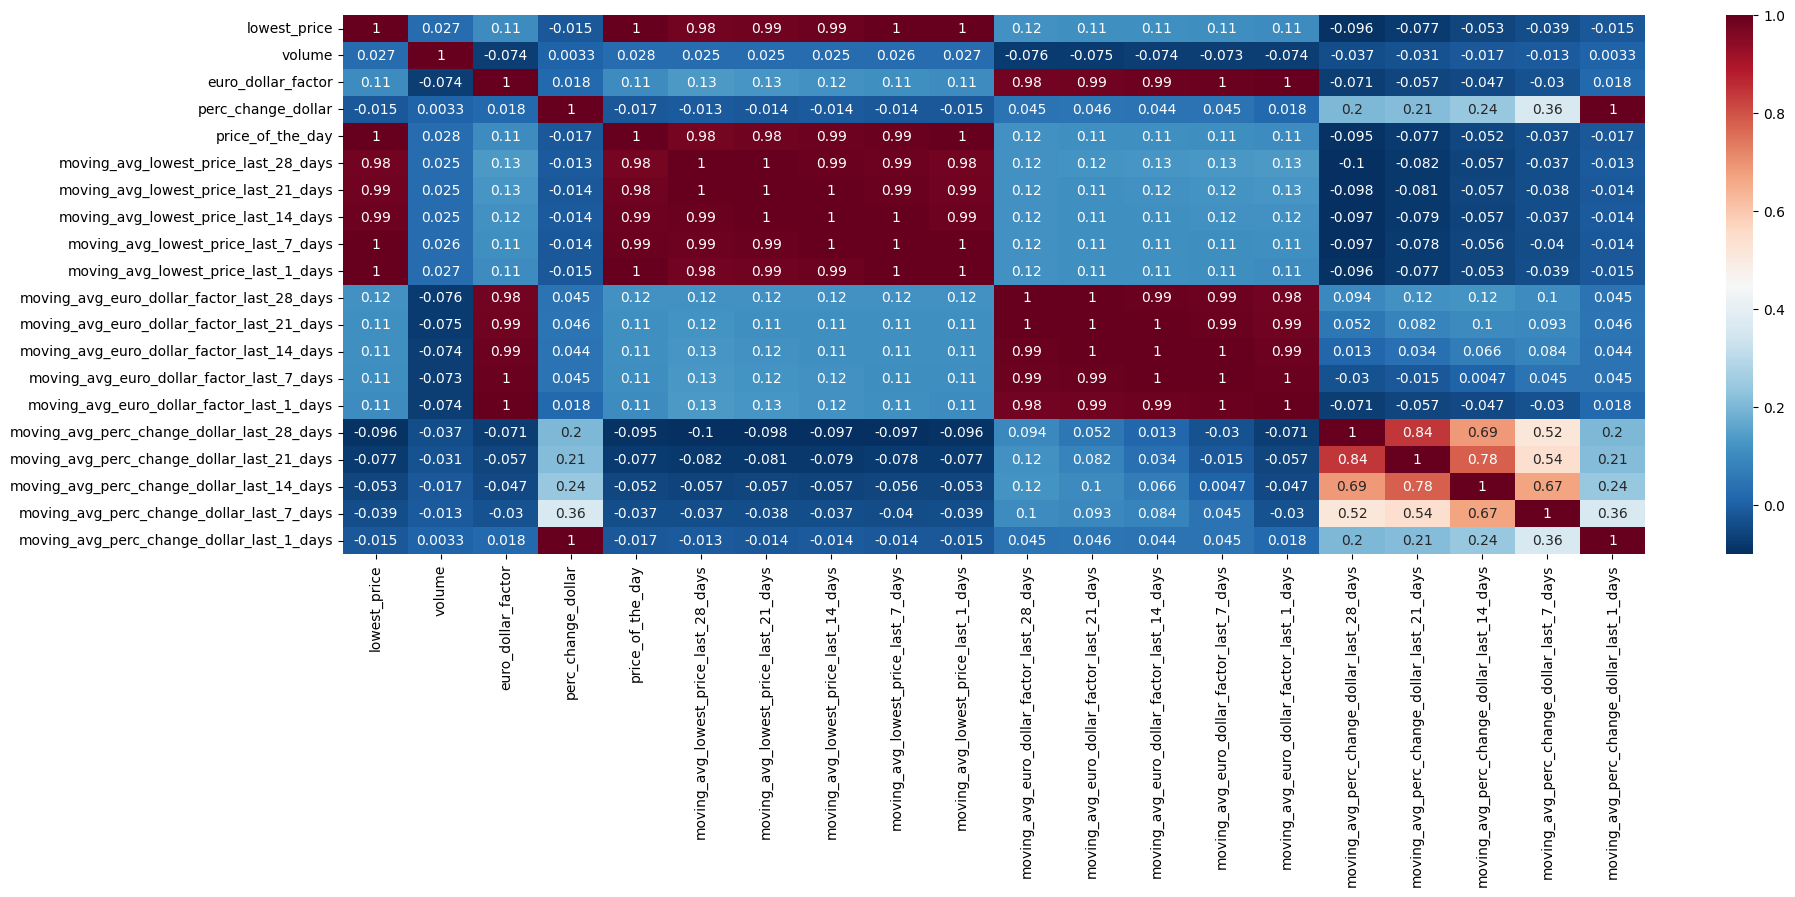

In [89]:
# Removing Correlated Columns
df_cleaned_enriched_bitcoin_price = df_cleaned_enriched_bitcoin_price.drop(['biggest_price', 'first_price', 'last_price', 'dollar_first_price'], axis=1)

# Ordering the data by date column
df_cleaned_enriched_bitcoin_price['date'] = df_cleaned_enriched_bitcoin_price['date'].astype('datetime64[ns]')
df_cleaned_enriched_bitcoin_price = df_cleaned_enriched_bitcoin_price.sort_values(by=['date'], ascending=True)

# Getting Moving Average by 28, 21, 14, 7, 1 days
lst_window_size = [28, 21, 14, 7, 1]
lst_columns = ['lowest_price', 'euro_dollar_factor', 'perc_change_dollar']
for col in lst_columns:
  for window_size in lst_window_size:
    new_col_name = 'moving_avg_' + col + '_last_' + str(window_size) + '_days'
    df_cleaned_enriched_bitcoin_price[new_col_name] = df_cleaned_enriched_bitcoin_price[col].rolling(window=window_size, min_periods=window_size).mean()

# Showing the correlation between the columns
fig, ax = plt.subplots(figsize=(21,7))
sns.heatmap(df_cleaned_enriched_bitcoin_price.corr(), annot=True, cmap='RdBu_r')

Note que neste ponto o *dataframe* está livre de forte correlação negativa. Por outro lado, vimos que as novas variáveis estão fortemente correlacionadas para a janela de tempo igual a 1 dia, como também para outra janela de tempo para as variáveis *euro_dollar_factor e lowest_price*. Logo, essas variáveis serão excluídas.

Como alternativa vamos criar uma coluna sobre o percentual de variação em relação à data anterior para essas duas variáveis e então calcular a média móvel sobre a variável percentual.

<Axes: >

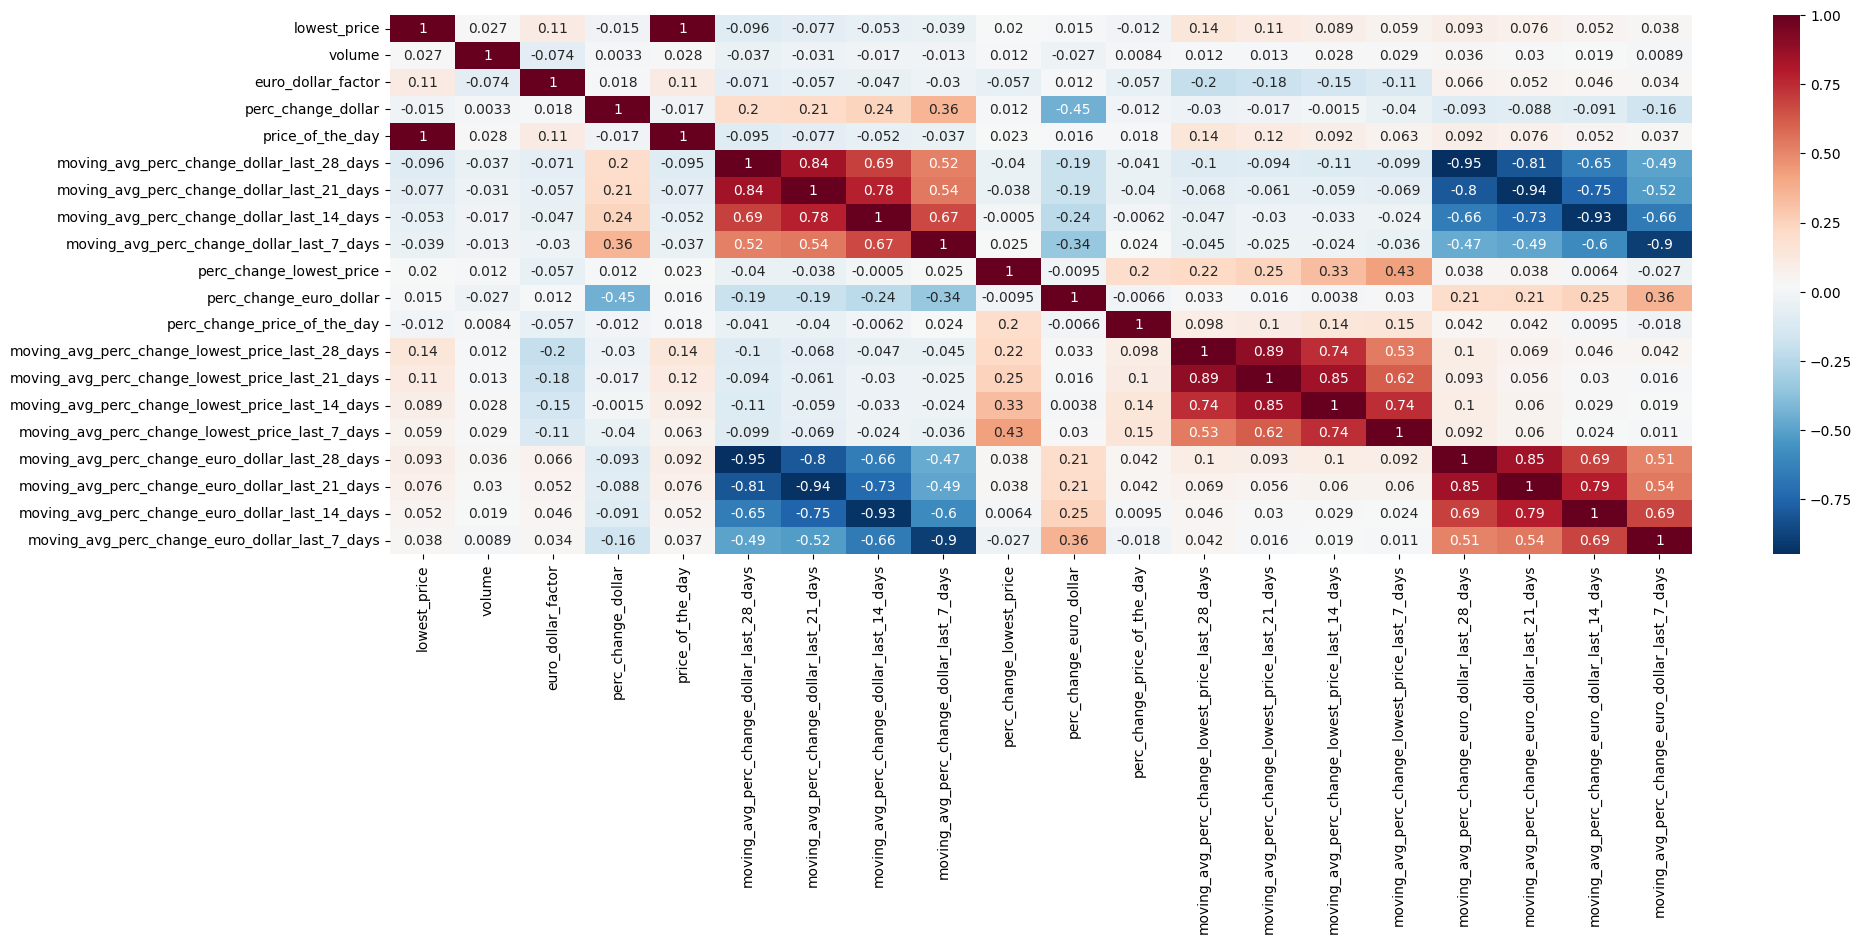

In [90]:
# Deleting correlated columns
lst_window_size = [28, 21, 14, 7, 1]
lst_columns = ['lowest_price', 'euro_dollar_factor']
lst_correlated_cols = ['moving_avg_perc_change_dollar_last_1_days']

# Getting list of correlated columns and deleting the columns
for col in lst_columns:
  for window_size in lst_window_size:
    lst_correlated_cols.append('moving_avg_' + col + '_last_' + str(window_size) + '_days')
df_cleaned_enriched_bitcoin_price = df_cleaned_enriched_bitcoin_price.drop(lst_correlated_cols, axis=1)

# Ordering the data by data column and then delete the column
df_cleaned_enriched_bitcoin_price = df_cleaned_enriched_bitcoin_price.sort_values(by=['date'], ascending=True)

# Creating the perc_variation column for lowest_price and euro_dollar_factor
df_cleaned_enriched_bitcoin_price['perc_change_lowest_price'] = 100 * (df_cleaned_enriched_bitcoin_price['lowest_price'] - df_cleaned_enriched_bitcoin_price['lowest_price'].shift(1)) / df_cleaned_enriched_bitcoin_price['lowest_price']
df_cleaned_enriched_bitcoin_price['perc_change_euro_dollar'] = 100 * (df_cleaned_enriched_bitcoin_price['euro_dollar_factor'] - df_cleaned_enriched_bitcoin_price['euro_dollar_factor'].shift(1)) / df_cleaned_enriched_bitcoin_price['euro_dollar_factor']

# Creating the perc_variation column for price_of_the_day (today = N)
# Remember: the user inform lowest_price, this variable is about yesterday (N-1)
df_cleaned_enriched_bitcoin_price['perc_change_price_of_the_day'] = 100 * (df_cleaned_enriched_bitcoin_price['price_of_the_day'] - df_cleaned_enriched_bitcoin_price['lowest_price']) / df_cleaned_enriched_bitcoin_price['price_of_the_day']

# Getting Moving Average by 28, 21, 14, 7 days
lst_window_size = [28, 21, 14, 7]
lst_columns = ['perc_change_lowest_price', 'perc_change_euro_dollar']
for col in lst_columns:
  for window_size in lst_window_size:
    new_col_name = 'moving_avg_' + col + '_last_' + str(window_size) + '_days'
    df_cleaned_enriched_bitcoin_price[new_col_name] = df_cleaned_enriched_bitcoin_price[col].rolling(window=window_size, min_periods=window_size).mean()

# Showing the correlation between the columns
fig, ax = plt.subplots(figsize=(21,7))
sns.heatmap(df_cleaned_enriched_bitcoin_price.corr(), annot=True, cmap='RdBu_r')

Novamente as variáveis sobre dólar e euro voltaram a apresentar forte correlação, agora quanto à média móvel no período de 7, 14, 21 e 28 dias. Em vista disso, vamos decidir por uma delas e fazer a removação necessária. Tendo em vista que a variável *lowest_price* está em dólar, vamos priorizar a variável *perc_change_dollar*, removendo a média móvel da coluna *euro_dollar_factor*.

Por fim, vamos deletar as colunas de média móvel para 14 e 21 dias por ter apresentado forte correlação positiva com a média móvel de 7 e 28 dias.

Abaixo apresentamos a correlação resultante de todas essas operações:

<Axes: >

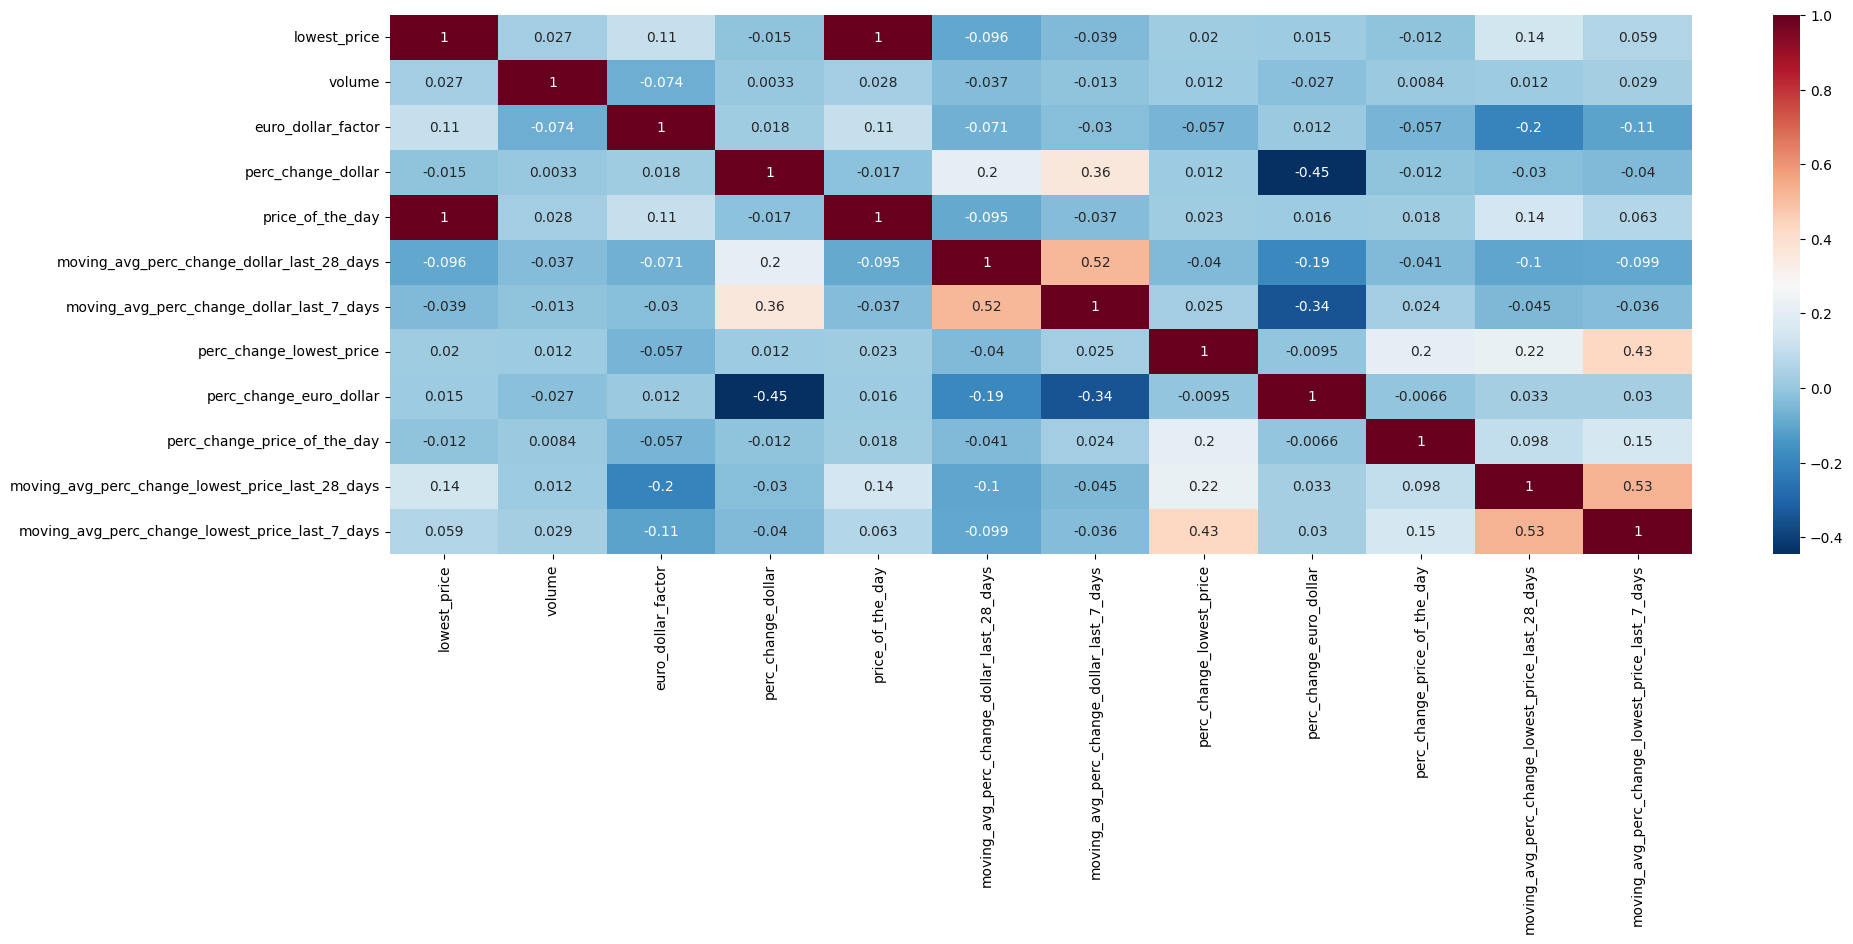

In [91]:
# Deleting moving mean of euro_dollar_factor
lst_correlated_cols = ['moving_avg_perc_change_euro_dollar_last_7_days', 'moving_avg_perc_change_euro_dollar_last_14_days', 'moving_avg_perc_change_euro_dollar_last_21_days', 'moving_avg_perc_change_euro_dollar_last_28_days']
lst_correlated_cols.append('moving_avg_perc_change_lowest_price_last_14_days')
lst_correlated_cols.append('moving_avg_perc_change_lowest_price_last_21_days')
lst_correlated_cols.append('moving_avg_perc_change_dollar_last_14_days')
lst_correlated_cols.append('moving_avg_perc_change_dollar_last_21_days')
df_cleaned_enriched_bitcoin_price = df_cleaned_enriched_bitcoin_price.drop(lst_correlated_cols, axis=1)

# Showing the correlation between the columns
fig, ax = plt.subplots(figsize=(21,7))
sns.heatmap(df_cleaned_enriched_bitcoin_price.corr(), annot=True, cmap='RdBu_r')

Agora vamos criar uma nova característica categórica que descreva a variação de *lowest_price* em 7 e 28 dias. Para definir a quantidade de categorias, vamos visualizar o histogram das variáveis *perc_change_lowest_price_moving_avg*.

Moving Average Analysis for 28 days on Lowest Price Perc. Variation: 


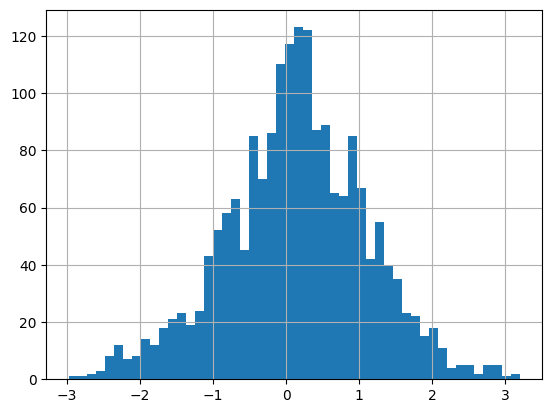

Moving Average Analysis for 7 days on Lowest Price Perc. Variation: 


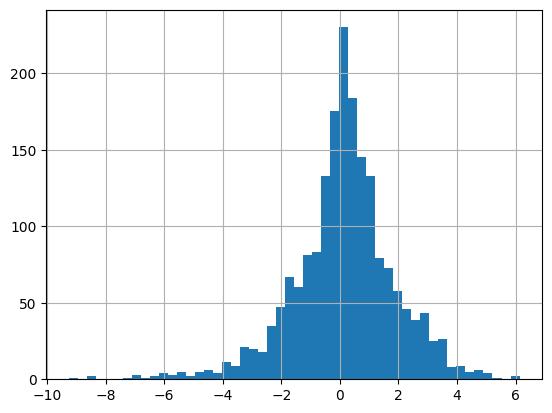

In [92]:
# Showing the histogram chart and descriptive statistics for moving average variables
print('Moving Average Analysis for 28 days on Lowest Price Perc. Variation: ')
df_cleaned_enriched_bitcoin_price['moving_avg_perc_change_lowest_price_last_28_days'].hist(bins=50)
plt.show()

print('Moving Average Analysis for 7 days on Lowest Price Perc. Variation: ')
df_cleaned_enriched_bitcoin_price['moving_avg_perc_change_lowest_price_last_7_days'].hist(bins=50)
plt.show()

Conforme o esperado, a média móvel para um período maior apresenta uma suavização das flutuações diárias. Tal fenômeno pode endoçar a hipótese 2 deste trabalho: há mais oportunidade de lucro no intervalo de 7 dias do que em 28.

Para por em prática mais conceitos vistos na pós-graduação, vamos criar variáveis categóricas e na sequência as transformar em um vetor numérico. Listamos abaixo o intervalo de cada categoria:


*   Categoria A-: Valores menores que -3
*   Categoria B-: Valores entre -3 e -2 (exclusive)
*   Categoria C-: Valores entre -2 e -1 (exclusive)
*   Categoria D-: Valores entre -1 e 0 (exclusive)
*   Categoria Z:  valores igauis a 0
*   Categoria D+: Valores entre 0 (exclusive) e 1
*   Categoria C+: Valores entre 1 (exclusive) e 2
*   Categoria B+: Valores entre 2 (exclusive) e 3
*   Categoria A+: Valores maiores que 3

Abaixo apresentamos uma função que faz a atribuição da categoria para a coluna especificada do *dataframe* e exibe a quantidade de itens por categoria:



In [93]:
def applying_category(df, col):
  # Creating the conditions of each category and then apply it for the column value
  conditions = [
      df[col].lt(-3),
      (df[col].ge(-3)) & (df[col].lt(-2)),
      (df[col].ge(-2)) & (df[col].lt(-1)),
      (df[col].ge(-1)) & (df[col].lt(0)),
      df[col].eq(0),
      (df[col].gt(0)) & (df[col].le(1)),
      (df[col].gt(1)) & (df[col].le(2)),
      (df[col].gt(2)) & (df[col].le(3)),
      df[col].gt(3)
  ]

  choices = ['A-', 'B-', 'C-', 'D-', 'Z', 'D+', 'C+', 'B+', 'A+']
  df['category_of_' + col] = np.select(conditions, choices, default='None') #Default value for the first n records that have no previous value

  print('Total of items by category: ')
  print(df.groupby('category_of_' + col).size().sort_values(ascending=True))
  print('\n')

Finalmente, vamos aplicar essa função às duas variáveis de média móvel da *perc_change_lowest_price* e a variável *perc_change_lowest_price*

In [94]:
# Applying the function for both moving average on perc_change_lowest_price
applying_category(df_cleaned_enriched_bitcoin_price, 'moving_avg_perc_change_lowest_price_last_7_days')
applying_category(df_cleaned_enriched_bitcoin_price, 'moving_avg_perc_change_lowest_price_last_28_days')
applying_category(df_cleaned_enriched_bitcoin_price, 'perc_change_lowest_price')

Total of items by category: 
category_of_moving_avg_perc_change_lowest_price_last_7_days
None      8
A-       87
B-       87
A+       92
B+      142
C-      217
C+      288
D-      417
D+      585
dtype: int64


Total of items by category: 
category_of_moving_avg_perc_change_lowest_price_last_28_days
A+        3
None     29
B-       42
B+       50
C-      174
C+      292
D-      577
D+      756
dtype: int64


Total of items by category: 
category_of_perc_change_lowest_price
None      2
B-      107
B+      144
C-      178
A-      212
C+      253
A+      265
D-      314
D+      448
dtype: int64




Como queremos saber o preço futuro do bitcoin, vamos criar duas variáveis que serão utilizadas como classe para os modelos. Então, para o intervalo de 7 e 28 dias a frente a variável *price_of_the_day*, criamos a coluna Média Móvel da porcentagem de variação do menor preço.

In [95]:
# Creating the model class variables: Cumulative Average by 7 and 28 days
df_cleaned_enriched_bitcoin_price = df_cleaned_enriched_bitcoin_price.sort_values(by=['date'], ascending=False) # Ordering Desc by date
df_cleaned_enriched_bitcoin_price['moving_avg_perc_change_price_of_the_day_next_7_days'] = df_cleaned_enriched_bitcoin_price['perc_change_price_of_the_day'].rolling(window=7, min_periods=7).mean()
df_cleaned_enriched_bitcoin_price['moving_avg_perc_change_price_of_the_day_next_28_days'] = df_cleaned_enriched_bitcoin_price['perc_change_price_of_the_day'].rolling(window=28, min_periods=28).mean()

# Keep original order of time sequence
df_cleaned_enriched_bitcoin_price = df_cleaned_enriched_bitcoin_price.sort_values(by=['date'], ascending=True)

Agora vamos remover os valores *Null*, *NaN* e *None* que foram produzidos pela geração das novas variáveis e exibir o total de linhas do *dataframe*.

In [96]:
df_cleaned_enriched_bitcoin_price = df_cleaned_enriched_bitcoin_price.dropna(axis=0)
print('Total de Linhas Disponíveis: ' + str(df_cleaned_enriched_bitcoin_price.shape[0]))

Total de Linhas Disponíveis: 1867


Por último, e não menos importante (senão mais), vamos criar a variável categórica que será o label para os modelos de classificação. Serão duas: uma para o intervalo de 7 dias a frente e outra para 28.

In [97]:
# Applying the function for both moving average on perc_change_price_of_the_day
applying_category(df_cleaned_enriched_bitcoin_price, 'moving_avg_perc_change_price_of_the_day_next_7_days')
applying_category(df_cleaned_enriched_bitcoin_price, 'moving_avg_perc_change_price_of_the_day_next_28_days')

Total of items by category: 
category_of_moving_avg_perc_change_price_of_the_day_next_7_days
A-     80
B-     86
A+     92
B+    141
C-    209
C+    279
D-    405
D+    575
dtype: int64


Total of items by category: 
category_of_moving_avg_perc_change_price_of_the_day_next_28_days
A+      3
B-     42
B+     50
C-    154
C+    292
D-    571
D+    755
dtype: int64




**3.5. Transformação *one-hot-encoding***

Vários modelos de *machine learning* não suportam variáveis do tipo categóricas. Por isso, vamos transformar as categorias criadas anteriormente em um vetor numérico, usando a transformação *one-hot-encoding*. Como resultado, teremos cada categoria representada numericamente por um vetor único.

In [98]:
# Using one-hot-enconder form scikit-learning
encoder = OneHotEncoder(drop='first', sparse=False)

# Ordering by date and create a row_num indice
df_cleaned_enriched_bitcoin_price = df_cleaned_enriched_bitcoin_price.sort_values(by='date', ascending=True)
df_cleaned_enriched_bitcoin_price['row_num'] = np.arange(len(df_cleaned_enriched_bitcoin_price))

# Turning categories into numbers vector
for n_days in ['7', '28']:
  mat_dummy = encoder.fit_transform(df_cleaned_enriched_bitcoin_price[['category_of_moving_avg_perc_change_lowest_price_last_' + n_days + '_days']])
  lst_dummy_cols = []

  # Create the name of each dummy cols
  for id_col in range(0, mat_dummy.shape[1]):
    lst_dummy_cols.append('dummy_col_' + str(id_col) + '_moving_avg_' + n_days)

  # Create a pandas dataframe and then merge it with the main dataframe
  df_dummy = pd.DataFrame(mat_dummy, columns = lst_dummy_cols)
  df_dummy['row_num'] = np.arange(len(df_dummy))

  df_cleaned_enriched_bitcoin_price = pd.merge(df_cleaned_enriched_bitcoin_price, df_dummy, on=['row_num'], how='inner')
  df_dummy = None

# Deleting only features category variables and row_num
df_cleaned_enriched_bitcoin_price = df_cleaned_enriched_bitcoin_price.drop(['category_of_perc_change_lowest_price', 'category_of_moving_avg_perc_change_lowest_price_last_7_days', 'category_of_moving_avg_perc_change_lowest_price_last_28_days', 'row_num'], axis=1)

Enfim temos o *dataframe* pré-processado e pronto para a etapa seguinte, Modelagem e Interferência. Vamos visualizar as suas informações.

In [99]:
print(df_cleaned_enriched_bitcoin_price.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 30 columns):
 #   Column                                                            Non-Null Count  Dtype         
---  ------                                                            --------------  -----         
 0   date                                                              1867 non-null   datetime64[ns]
 1   lowest_price                                                      1867 non-null   float64       
 2   volume                                                            1867 non-null   float64       
 3   euro_dollar_factor                                                1867 non-null   float64       
 4   perc_change_dollar                                                1867 non-null   float64       
 5   price_of_the_day                                                  1867 non-null   float64       
 6   moving_avg_perc_change_dollar_last_28_days                        1867 n